In [12]:
!pip install astropy

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astroquery

#Import packages
from astropy.io import fits
from astropy import units
from astropy.table import Table
import numpy as np, pandas as pd

#Astroquery is what we use to download data from SDSS
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy import constants as const

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

import pickle
pickle.HIGHEST_PROTOCOL = 4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
#Load stellar mass estimate data from SDSS12


#To Pandas
StellarMassDust_data = Table(fits.open('granada_fsps_krou_wideform_dust-v5_7_2.fits.gz')[1].data).to_pandas()

#Removing multidimensional columns
#names = tuple(name for name in Table.colnames if len(Table[name].shape) <= 1)
#StellarMassDust_data = Table[names]

#Straight to hdf5
#/content/granada_fsps_krou_wideform_dust-v5_7_2.fits.gz.to_hdf('Data/StellarMassDust_data.hdf5', key = 'Dust', mode = 'w')




StellarMassNoDust_data = Table(fits.open('granada_fsps_krou_wideform_nodust-v5_7_2.fits.gz')[1].data).to_pandas()

ValueError: ignored

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8

plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

NameError: ignored

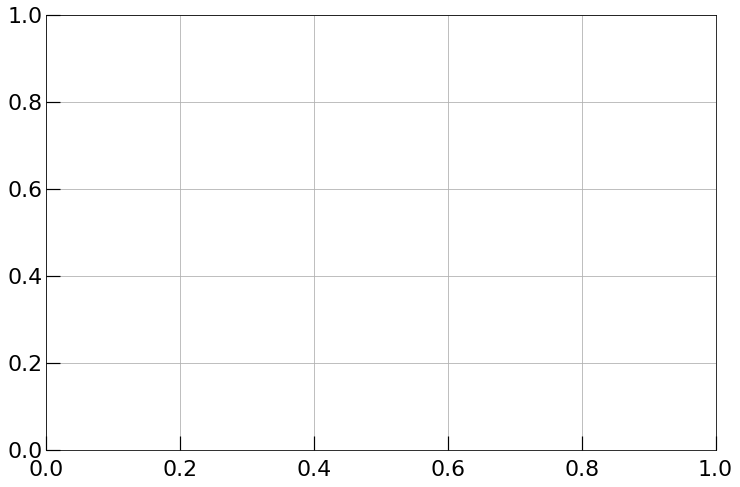

In [5]:
plt.figure(figsize=(12,8))
plt.grid()

Mask = (StellarMassDust_data.LogMass > 0) & (StellarMassDust_data.LogMass < 100) & (StellarMassNoDust_data.LogMass > 0) & (StellarMassNoDust_data.LogMass < 100)
plt.scatter(StellarMassDust_data.LogMass, StellarMassNoDust_data.LogMass)

plt.xlabel('Stellar Mass - Dust', size = 40)
plt.ylabel('Stellar Mass - No Dust', size = 40)